# Lab 01 - Linear Algebra and Numpy

Welcome to the first lab in CS3400! If you can edit this you probably have a working instance of jupyter notebook (either locally or on ROSIE). If you are looking at this as an pdf, maybe you still need to get an instance of Jupyter running. Please follow the neccessary steps in Experiment 1.

# Experiment 1

In this experiment you will be making sure that you can connect to ROSIE and run an interactive session (jupyter notebook session).  You will have a username on ROSIE by the start of class, but if it is a new account you may have to reset your password. Ask your instructor for the default password. At the current time, to do this you will have to access the terminal on ROSIE - meaning you will have to ssh in. Once you have reset your password, you will be able to access ROSIE's web portal and initiate interactive session from there. The following steps and sections will give you what you need to start.

## Accessing ROSIE
An objective of this class is to give you some more experinece using remote resources and ROSIE is a great resource to have. Our current admin is Dr. Retert. Please refer to ROSIE's [webpage](https://msoe.dev/#/) as a first step in finding solutions to issues you may be having. Your instructor is also a good resource if troubleshooting is required.

### SSH Client
If you are on windows, you will have to download and install an ssh client. A commonly used and free client is [Putty](https://www.putty.org/). Please follow the link and install Putty on your machine.

### On network or off
If you are doing these steps off-campus, you will need to use a VPN to access the network that ROSIE is on. To do this you can follow the written instruction on [msoe.dev - Activiation](https://msoe.dev/#/access). 

### Starting an Interactive session
Once you have access to ROSIE's network (VPN) and you have a username and current password (done through the SSH client), you can now complete the steps for starting an interactive session. You should access [ROSIE's web portal](http://dh-ood.hpc.msoe.edu/) and start a jupyter notebook session to run (and complete) this notebook.

# Experiment 2 - Structuing your Data and Feature Matrices / Slicing
In this experiment you will refamiliarize yourself with python/numpy and use some of the common data manipulation techniques that you will need for the rest of the class.

## What is Numpy?
- Matrix library
- Memory-efficient data structures -- arrays
    - Used in scikit-learn, matplotlib, and others
- Expressive API for indexing and operations
- Time-efficient algorithms
    - Calls C and Fortran libraries where possible
    
## How Do I Import Libraries into my Jupyter Notebook working kernel?
- The following bit of code can be used to import libraries. The world is your oyster!

In [7]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
picturename = '/data/cs3400/misc/mb.gif'
datapath = '/data/cs3400/datasets/IRIS.csv'

## How to read in files, organize data, and plot some features!
In the first step you will read the IRIS.csv file that you are given (which is also on our class's datashare on ROSIE) and put the features into a matrix. In machine learning the standard for organizing matrices is always observations in rows, and features that describe the observations as columns. Read in the data file and assign the data to a numpy matrix.

1. Use the function numpy.loadtxt.
    - You will want to use the proper delimiter for the file you have.
    - Make sure that you skip any text rows, numpy matrices can only be a single datatype.
    - Depending on the dataset you may need to specify what columns you want to use.
    - If you get stuck and don't want to head to the web, you can always use the the help command for more information e.g. `help(np.loadtext)`

With your data matrix you should explore the data a bit.
2. Use `data.shape` to find your dimensions
3. Plot the first two features your data using matplotlib. Label all of your axes and use legends!
    1. Make a figure with a line plot
    2. Make another figure with a scatter plot
    3. Make a third figure displaying both the same line and scatter plots.
4. Print all of the feature values for the 150th observation in your dataset.
5. Select observations 49-52 from your dataset and print them to the notebook.
6. Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results. (hint: do this in multiple steps. First make a boolean mask of your matrix)
7. Calculate the median, standard deviation, and mode of the entries selected in the previous step. (Hint 1: these should be done column by column. Hint 2: Don't forget about other packages like scipy!)

### 1) Load the IRIS.csv file into a numpy matrix

In [8]:
iris_data = np.loadtxt('../Data/IRIS.csv', delimiter=',', skiprows=1, usecols=range(0,4), dtype='float')
# display(iris_data)

### 2) Display its dimensions (`data.shape`)

In [9]:
iris_data.shape

(150, 4)

### Plot the first two features of your data using matplotlib. Label all of your axes and use legends!

### 3-A) Make a line plot of the first two dimensions using matplotlib

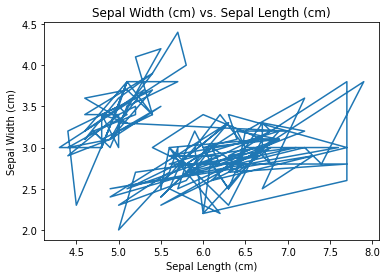

In [10]:
plt.title('Sepal Width (cm) vs. Sepal Length (cm)') 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.plot(iris_data[:, 0], iris_data[:, 1])
plt.show()

### 3-B) Make a scatter plot of the first two dimensions using matplot lib

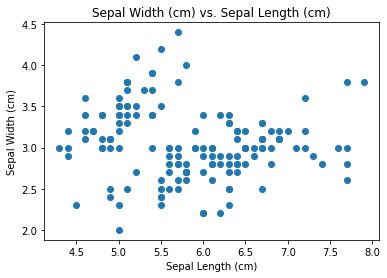

In [11]:
plt.title('Sepal Width (cm) vs. Sepal Length (cm)') 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(iris_data[:, 0], iris_data[:, 1])
plt.show()

### 3-C) Make a third figure displaying both the same line and scatter plots

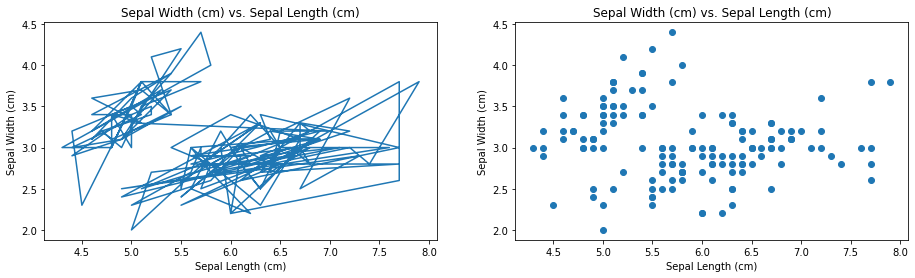

In [12]:
plt.subplot(1,2,1)

plt.title('Sepal Width (cm) vs. Sepal Length (cm)') 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.plot(iris_data[:, 0], iris_data[:, 1])

plt.subplot(1,2,2)
plt.title('Sepal Width (cm) vs. Sepal Length (cm)') 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(iris_data[:, 0], iris_data[:, 1])


plt.subplots_adjust(left=1, right=3)

plt.show()


 ### 4) Print all of the feature values for the 150th observation in your dataset.

In [13]:
print(iris_data[149][:])

[5.9 3.  5.1 1.8]


### 5) Select observations 49-52 from your dataset and print them to the notebook.

In [14]:
print(iris_data[49:53][:])

[[5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]]


### 6) Select all of the entries in your dataset that have their first feature <= 5 and print the first 5 results (Hint: Do this in multiple steps. First make a boolean mask of your matrix)

In [15]:
mask = iris_data[:, 0] <= 5
result = iris_data[mask]
print(result[:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [4.6 3.4 1.4 0.3]]


### 7) Calculate the median, standard deviation, and mode of the entries selected in the previous step. (Hint 1: these should be done column by column. Hint 2: Don't forget about other packages like scipy!)

In [16]:
from scipy import stats

print('median = ',  np.median(result, axis=0))
print('standard deviation = ', np.std(result, axis=0))
print('mode by column = ', stats.mode(result, axis=0)[0][0])

median =  [4.85 3.1  1.45 0.2 ]
standard deviation =  [0.21323403 0.38649062 0.77295597 0.34708608]
mode by column =  [5.  3.  1.4 0.2]


# Experiment 3 - Linear Algebra in Numpy
In this experiment you will be performing a number of linear algebra operations in your jupyter notebook. Check out the linalg module of numpy!

We have started by creating a few vectors and matrices for you.

In [17]:
array_1 = np.array([1, 2, 3, 4, 5], dtype=np.float32)
print(array_1)
array_2 = np.zeros(4, dtype=np.int32)
print(array_2)
matrix_1 = np.ones((4,5), dtype=np.float64)
print(matrix_1)
matrix_2 = np.eye(5,5)
print(matrix_2)

[1. 2. 3. 4. 5.]
[0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


You will:
1. Create a few more numpy vectors and matrices
2. Print the number of dimensions each of your numpy vectors and matrices
3. Print the shape (length and dimension) of each of your numpy vectors and matrices
4. Print the datatype used in each of your numpy vectors and matrices
5. Try to compute a dot product on two matrices of with disagreeable dimensions
6. Compute a dot product on two matrices with agreeable dimensions
7. Try to compute element-wise addition on two matrices with disagreeable dimensions
8. Compute an element-wise addition on two matrices with agreeable dimensions
9. Compute the norm (distance) between a vector and itself
10. Compute the norm (distance) between two different vectors
11. Apply a set of linear coefficients to a matrix of observations.

### 1) Create numpy vectors and matrices (we have done a few for you)

In [18]:
v1 = np.array([[20, 11, 32, 24, 55, 76, 82]], dtype=np.float64)    # double [] gives shape 2D -> (1,7)
print('v1 = ', v1)

v2 = np.zeros(5, dtype=np.int8)
print('v2 = ', v2)

v3 = np.arange(0, 51, 5, dtype=np.int32)
print('v3 = ', v3)

m1 = np.arange(0, 25).reshape(5,5)
print('m1 = ', m1)

m2 = np.random.randn(2,4)
print('m2 = ', m2)

m3 = np.ones((8,5), dtype=np.float64)
print('m3 = ', m3)

v1 =  [[20. 11. 32. 24. 55. 76. 82.]]
v2 =  [0 0 0 0 0]
v3 =  [ 0  5 10 15 20 25 30 35 40 45 50]
m1 =  [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
m2 =  [[-1.42755244 -1.0524649   0.06589539  2.63251729]
 [-1.68817565  0.42785452 -0.23318994 -0.020212  ]]
m3 =  [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### 2) Print the number of dimensions each of your numpy vectors and matrices

In [19]:
print('v1 ', v1.ndim)
print('v2 ', v2.ndim)
print('v3 ', v3.ndim)
print('m1 ', m1.ndim)
print('m2 ', m2.ndim)
print('m3 ', m3.ndim)

v1  2
v2  1
v3  1
m1  2
m2  2
m3  2


### 3. Print the sahpe (length and dimension) of each of your numpy vectors and matrices

In [20]:
print('v1 ', v1.shape)
print('v2 ', v2.shape)
print('v3 ', v3.shape)
print('m1 ', m1.shape)
print('m2 ', m2.shape)
print('m3 ', m3.shape)

v1  (1, 7)
v2  (5,)
v3  (11,)
m1  (5, 5)
m2  (2, 4)
m3  (8, 5)


### 4) Print the datatype used in each of your numpy vectors and matrices

In [21]:
print('v1 ', v1.dtype)
print('v2 ', v2.dtype)
print('v3 ', v3.dtype)
print('m1 ', m1.dtype)
print('m2 ', m2.dtype)
print('m3 ', m3.dtype)

v1  float64
v2  int8
v3  int32
m1  int32
m2  float64
m3  float64


### 5) Try to compute a dot product on two matrices of with disagreeable dimensions

In [22]:
np.dot(m1, m2)

ValueError: shapes (5,5) and (2,4) not aligned: 5 (dim 1) != 2 (dim 0)

### 6) Compute a dot product on two matrices with agreeable dimensions

In [23]:
A = np.ones((2, 5))
B = np.ones((5, 2)) * 5
np.dot(A, B)

array([[25., 25.],
       [25., 25.]])

### 7) Try to compute element-wise addition on two matrices with disagreeable dimensions

In [25]:
np.add(A, B)

ValueError: operands could not be broadcast together with shapes (2,5) (5,2) 

### 8) Compute an element-wise addition on two matrices with agreeable dimensions

In [26]:
B = B.reshape((2,5))
np.add(A, B)

array([[6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.]])

### 9) Compute the norm (distance) between a vector and itself

In [27]:
vect1 = np.arange(3)
np.linalg.norm(vect1 - vect1)

0.0

### 10) Compute the norm (distance) between two different vectors

In [28]:
vect1 = np.arange(4)
vect2 = np.arange(4) + 1
np.linalg.norm(vect1 - vect2)

2.0

### 11) Apply a set of linear coefficients to a matrix of observations.
From your problem set you can see the form of this model:

$$ y = \beta^{12}_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} $$

which can also be represented in vector notation as:

$$ y = x^{T}\mathbf{\beta} $$

Use the vectors that you created in problem 5 of problem set 1 and evaluate it here. Evaluate it twice, once using matrix multiplication and once with dot products

In [29]:
x = np.array([[1, 2, 3, 4]])
beta = np.arange(5,9).reshape(1, 4)

y_dot = np.dot(np.transpose(x), beta)
y_mat = np.matmul(np.transpose(x), beta)

print(y_dot)
print(y_mat)

[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]
[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]


# Bonus Material: Additional Indexing Topics

Before considering the following indexing procedures, think about the following question. Can I index a vector (nx1) using a matrix (nxm)? What would happen if I try?

In [30]:
X = np.random.randint(10, size=(10, 3)) 
y = np.expand_dims(np.array([1, 0, 1, 1, 0, 0, 2, 2, 1, 0], dtype=np.int32),axis=1)

Think of the above matrix, X, as a feature matrix (10x3) and the above vector, y, as a response vector/matrix (10x1). How can I index and get the first index of X or y? 

In [31]:
y[0,0]

1

In [32]:
X[0,0]

2

What if I want multiple elements from this array that are not sequential? Such as element 0 and element 7?

In [33]:
print(y[0,0])
print(y[7,0])

1
2


Pretty straighforward, eh? Can I do this in one go?

In [34]:
print(y[[0,7],[0,0]])

[1 2]


Not too shabby! Now, is there anything preventing me from re-indexing the same element? Let's try!

In [35]:
print(y[[7,7],[0,0]])

[2 2]


__woah__

Finally, lets take this to a rediculous conclusion... What happens if I supply more index calls (as a matrix) than the variable has in shape?

In [36]:
print(y[[7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [37]:
Image(picturename)

FileNotFoundError: No such file or directory: '/data/cs3400/misc/mb.gif'

FileNotFoundError: No such file or directory: '/data/cs3400/misc/mb.gif'

<IPython.core.display.Image object>